In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## Predictive modeling of customer bookings

We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [55]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [57]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

# Convertin data type of `flight_day` column using `map`  

In [58]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [59]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

# Convert **'sales_channel'** and **'trip_type'** columns to numerical type using `label encoding`

In [60]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'sales_channel' column
df['sales_channel'] = le.fit_transform(df['sales_channel'])

# Fit and transform the 'trip_type' column
df['trip_type'] = le.fit_transform(df['trip_type'])

In [61]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,1.987620,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.129873,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (**only works for numeric columns**). This gives us a quick overview of a few things such as the **mean, min, max and overall distribution** of each column.


# Pie Chart

<Axes: ylabel='count'>

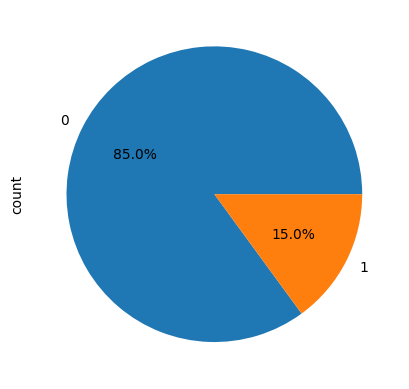

In [62]:
df['booking_complete'].value_counts().plot.pie(autopct='%1.1f%%')


# Heatmap of Correlations

<Axes: >

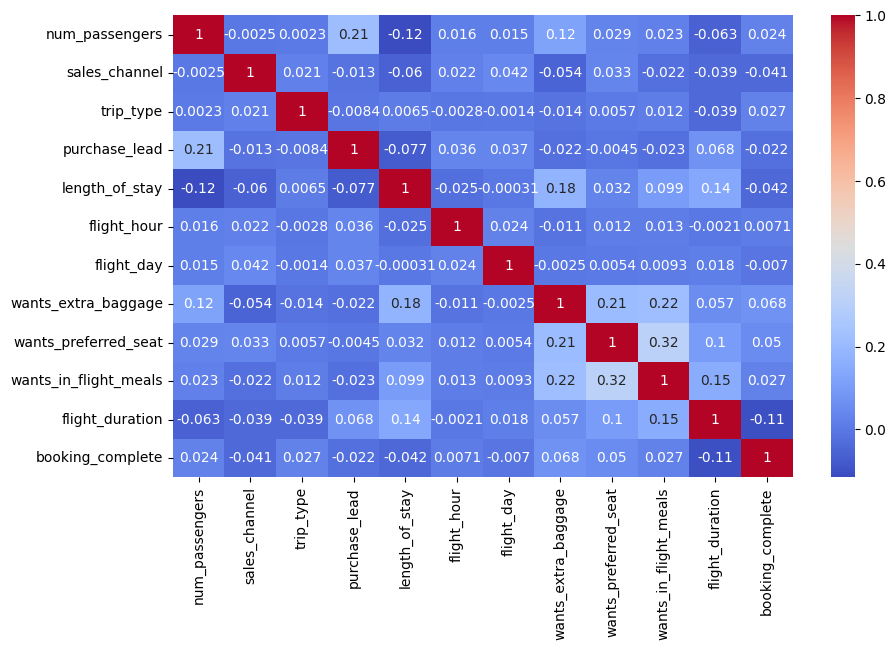

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

*   Most features show weak to very weak correlations.
*   Highest correlations are between optional services like `extra baggage, meals, and seat preference`.
*   `booking_complete` doesn't strongly depend on any single numeric feature — indicating a complex decision-making process.

<Axes: >

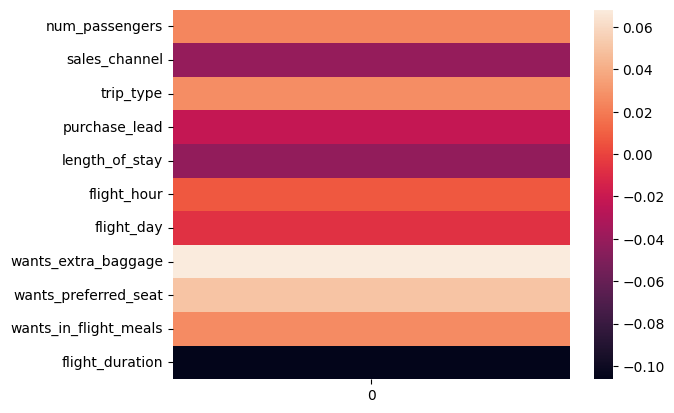

In [64]:
corr_with_target = df.drop(columns=['booking_complete', 'route','booking_origin']).corrwith(df['booking_complete'])
# The above line excludes the object type columns before calculating the correlation.
sns.heatmap(pd.DataFrame(corr_with_target))

#Top Positively Correlated Features:

wants_extra_baggage → ~0.068

wants_preferred_seat → ~0.05

wants_in_flight_meals → ~0.027

num_passengers → ~0.024

### Yeh dikhata hai ki jin users ne extra services select ki, unke bookings complete hone ke chances thode zyada the.

# **Feature Engineering**
---

In [65]:
# Combine the three optional services:

df['total_services_opted'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']

---
---
# **ML**
---
---

# Train a **machine learning model** to predict "`booking_complete`" use a **RandomForest model**


# Import necessary libraries

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)

In [67]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Convert categorical features to numerical using **one-hot encoding**

In [68]:
X = pd.get_dummies(X, columns=['route', 'booking_origin'], drop_first=True)

# Split data into training and testing sets

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a **RandomForestClassifier**

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions on the test set

In [71]:
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RandomForest model: {accuracy}")

Accuracy of the RandomForest model: 0.8531


# **Model Evaluation**
---
---

In [73]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KFold for cross-validation

In [74]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores

In [75]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

In [76]:
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores)}")

Cross-validation accuracy scores: [0.8541 0.8489 0.848  0.8489 0.8566]
Mean cross-validation accuracy: 0.8513
Standard deviation of cross-validation accuracy: 0.0034158454297582145


# Evaluate the model using additional metrics

In [77]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000

[[8328  192]
 [1277  203]]


# Visualisation to interpret each variable's contribution
---
---

In [78]:
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization

In [79]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances

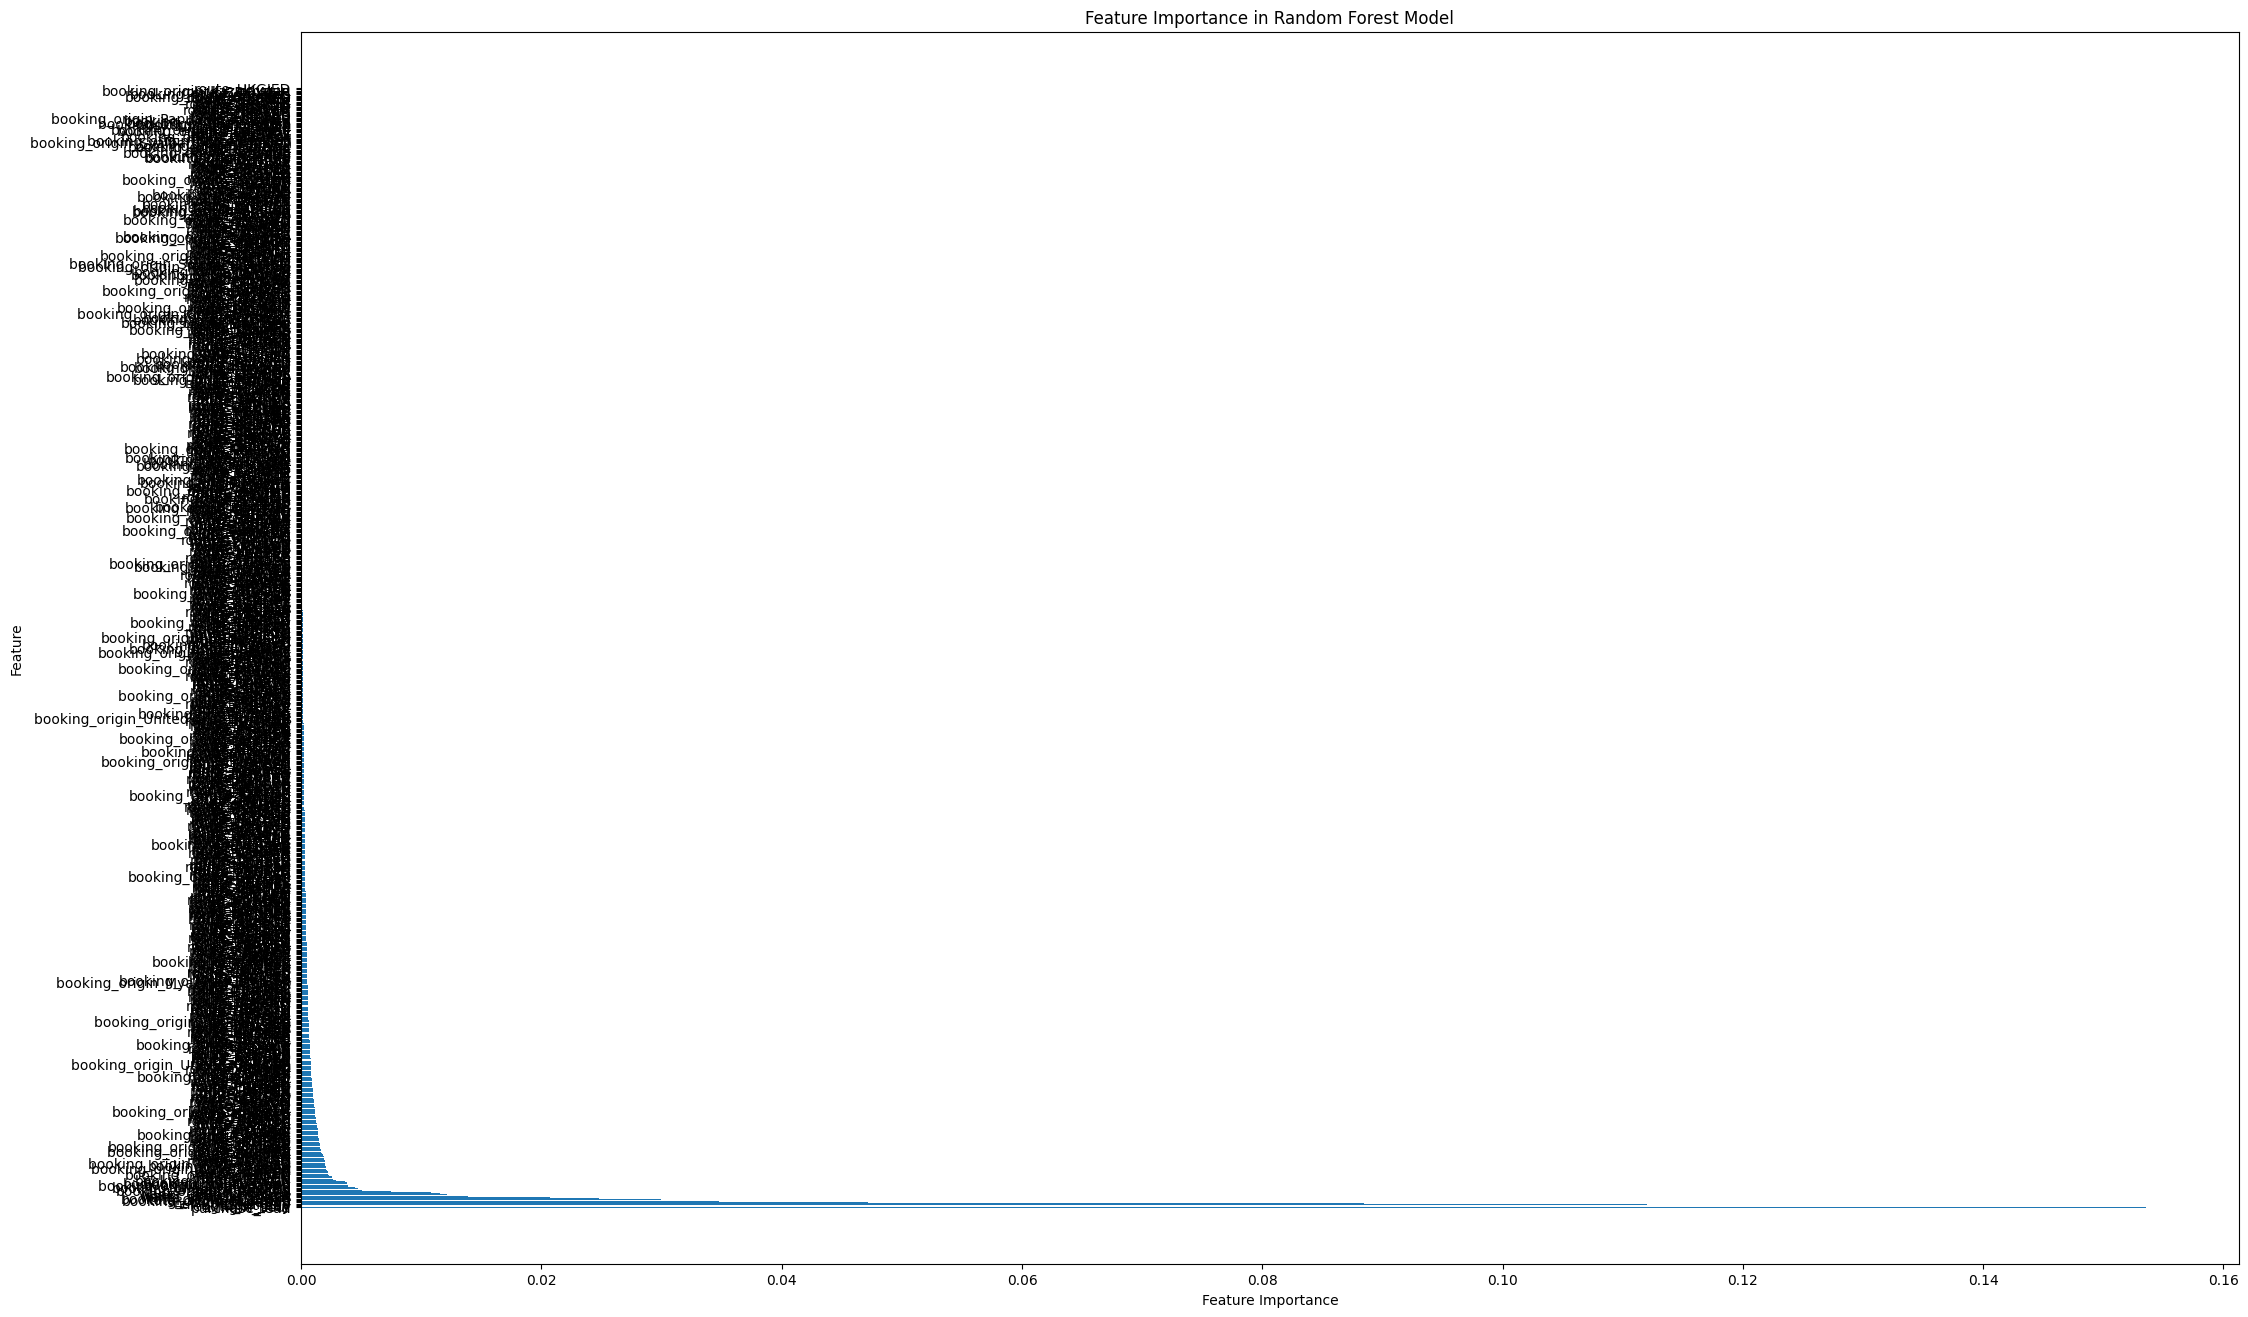

In [86]:
plt.figure(figsize=(25, 16))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis() # Invert y-axis to show highest importance at the top
plt.show()

In [85]:
feature_importance_df

,Feature,Importance
3,purchase_lead,0.153583
5,flight_hour,0.125415
4,length_of_stay,0.112003
6,flight_day,0.088450
0,num_passengers,0.047203
...,...,...
817,booking_origin_Belarus,0.000000
196,route_CSXPER,0.000000
46,route_BDOWUH,0.000000
854,booking_origin_Kazakhstan,0.000000
